In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install imbalanced-learn

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    '''Convert class vector (integers from 0 to nb_classes)
    to binary class matrix, for use with categorical_crossentropy.
    '''
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1.
    return Y


def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp + 1e-06)
    npv = float(tn) / (tn + fn + 1e-06)
    sensitivity = float(tp) / (tp + fn + 1e-06)
    specificity = float(tn) / (tn + fp + 1e-06)
    mcc = float(tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) + 1e-06)
    f1 = float(tp * 2) / (tp * 2 + fp + fn + 1e-06)
    return acc, precision, npv, sensitivity, specificity, mcc, f1

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load features
path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
# w2vec = pd.read_csv(path + 'features/bow_word2vec_features_ACE.csv').values
esm2 = pd.read_csv(path + 'features/esm2_t6_8M_feat_ACE.csv', header=None).iloc[:, :].values
prot_t5 = pd.read_csv(path + 'features/PortT5.csv', header=None).iloc[:, 1:].values
esmv1 = pd.read_csv(path + 'features/esmv1_feat_ACE.csv', header=None).values
BPF = pd.read_csv(path + 'features/one-hot.csv', header=None).iloc[:, 1:].values
FEGS = pd.read_csv(path + 'features/FEGS_features.csv', header=None).iloc[1:, :].values
fasttext = pd.read_csv(path + 'features/fasttext_features_ACE.csv').values
bert = pd.read_csv(path + 'features/bert_features_ACE.csv').values
deep_feat_bilstm = pd.read_csv(path + 'features/BiLSTM_with_attention.csv',header = None).values

# Combine all features
# all_features = np.column_stack((w2vec, esm2, prot_t5, esmv1, BPF, FEGS, fasttext, bert))
all_feat = np.column_stack((esm2, prot_t5, esmv1,BPF,FEGS,fasttext,bert ))


# Convert to numpy array
data = np.array(all_feat)


# Labels (adjust the sizes as needed)
label1 = np.ones((394, 1))  # Value can be changed
label2 = np.zeros((626, 1))
labels = np.append(label1, label2)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print(np.shape(esm2))
print(np.shape(prot_t5))
print(np.shape(esmv1))
print(np.shape(BPF))
print(np.shape(FEGS))
print(np.shape(fasttext))
print(np.shape(bert))
print(np.shape(data_scaled))

(1020, 320)
(1020, 1024)
(1020, 1280)
(1020, 560)
(1020, 578)
(1020, 100)
(1020, 768)
(1020, 4630)


(816, 325)
(204, 325)
(816,)
(204,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6128 - loss: 1.6162 - val_accuracy: 0.6098 - val_loss: 0.9797 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6331 - loss: 0.9232 - val_accuracy: 0.6098 - val_loss: 0.8897 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6317 - loss: 0.8565 - val_accuracy: 0.6098 - val_loss: 0.8521 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6022 - loss: 0.8390 - val_accuracy: 0.6098 - val_loss: 0.7920 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6568 - loss: 0.7568 - val_accuracy: 0.8720 - val_loss: 0.7196 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6883 - loss: 0.7431 - val_accuracy: 0.8598 - val_loss: 0.5944 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6760 - loss: 0.7059 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.4935 - loss: 1.6132 - val_accuracy: 0.6135 - val_loss: 0.9450 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6327 - loss: 0.8859 - val_accuracy: 0.6135 - val_loss: 0.8526 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6018 - loss: 0.8155 - val_accuracy: 0.6135 - val_loss: 0.8092 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6060 - loss: 0.7677 - val_accuracy: 0.6135 - val_loss: 0.7663 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6581 - loss: 0.6912 - val_accuracy: 0.7914 - val_loss: 0.7085 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7370 - loss: 0.6715 - val_accuracy: 0.8037 - val_loss: 0.6370 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7567 - loss: 0.6571 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6202 - loss: 1.6305 - val_accuracy: 0.6135 - val_loss: 0.9964 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5816 - loss: 0.9550 - val_accuracy: 0.6135 - val_loss: 0.8952 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6458 - loss: 0.8485 - val_accuracy: 0.6135 - val_loss: 0.8568 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5658 - loss: 0.8331 - val_accuracy: 0.6135 - val_loss: 0.8013 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6228 - loss: 0.7713 - val_accuracy: 0.8160 - val_loss: 0.6711 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6360 - loss: 0.7484 - val_accuracy: 0.8589 - val_loss: 0.6675 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6925 - loss: 0.7118 - val_ac

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
CNN:acc=0.834356,precision=0.704545,npv=0.986667,sensitivity=0.984127,specificity=0.740000,mcc=0.707478,f1=0.821192,roc_auc=0.960635


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5404 - loss: 1.6355 - val_accuracy: 0.6074 - val_loss: 0.9718 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6166 - loss: 0.9302 - val_accuracy: 0.6074 - val_loss: 0.8691 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5981 - loss: 0.8387 - val_accuracy: 0.6074 - val_loss: 0.8238 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6200 - loss: 0.7933 - val_accuracy: 0.6074 - val_loss: 0.7687 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6012 - loss: 0.7746 - val_accuracy: 0.8098 - val_loss: 0.6742 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6950 - loss: 0.7116 - val_accuracy: 0.8282 - val_loss: 0.5956 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7805 - loss: 0.6725 - val_ac

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
CNN:acc=0.797546,precision=0.678161,npv=0.934211,sensitivity=0.921875,specificity=0.717172,mcc=0.625567,f1=0.781457,roc_auc=0.931029


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6026 - loss: 1.6267 - val_accuracy: 0.6074 - val_loss: 0.9992 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6253 - loss: 0.9470 - val_accuracy: 0.6074 - val_loss: 0.9010 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5974 - loss: 0.8676 - val_accuracy: 0.6074 - val_loss: 0.8615 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5923 - loss: 0.8306 - val_accuracy: 0.6074 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6292 - loss: 0.7614 - val_accuracy: 0.8282 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7239 - loss: 0.7104 - val_accuracy: 0.7423 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7341 - loss: 0.6938 - val_ac

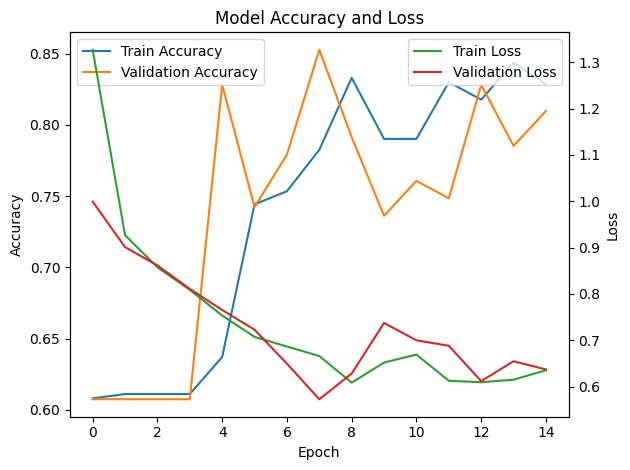

In [5]:
from sklearn.preprocessing import scale, MinMaxScaler
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.models import Sequential, model_from_json
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import GRU,Bidirectional,LSTM,BatchNormalization
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold,train_test_split
from keras.regularizers import l2
from keras.layers import Dense,Input,Dropout
import tensorflow as tf
from keras.layers import Layer
import os


# Custom Attention Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[-1],), initializer='random_normal', trainable=True)
        self.u = self.add_weight(name='att_u', shape=(input_shape[-1],), initializer='random_normal', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        u_it = tf.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        ait = tf.tensordot(u_it, self.u, axes=1)
        ait = tf.exp(ait)
        ait_sum = tf.reduce_sum(ait, axis=1, keepdims=True)
        ait = ait / ait_sum
        ait = tf.expand_dims(ait, axis=-1)
        return tf.reduce_sum(x * ait, axis=1)

def get_CNN_model(input_dim,out_dim):
    model = Sequential()
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', input_shape=(1, input_dim), kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(MaxPooling1D(pool_size=2, strides=1, padding="same"))
    model.add(Dropout(0.7))

    model.add(Conv1D(filters=32, kernel_size=3, padding='same', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(MaxPooling1D(pool_size=2, strides=1, padding="same"))
    model.add(Dropout(0.7))

    model.add(Bidirectional(GRU(8, return_sequences=True)))
    model.add(Dropout(0.7))
    # model.add(AttentionLayer())
    # model.add(Bidirectional(GRU(16, return_sequences=True)))
    # model.add(Bidirectional(LSTM(units=8, name='Bilstm',return_sequences=True)))
    # model.add(Dropout(0.5))
    # model.add(Bidirectional(LSTM(units=64, name='Bilstm',return_sequences=True)))
    # model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(int(input_dim/4), activation = 'relu'))
    model.add(Dense(int(input_dim/8), activation = 'relu'))
    model.add(Dense(int(input_dim/16), activation = 'relu'))
    model.add(Dense(out_dim, activation = 'sigmoid',name="Dense_2"))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    return model
#binary_crossentropy  categorical_crossentropy

#model.add(Dense(2, activation='sigmoid', name="Dense_2"))
#model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])  # rmsprop
###########################

path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
data_ = pd.read_csv(path + 'selected_features_allfeat/EN_ACE_selected_features.csv',header = None)

data_np = np.array(data_)
data = data_np[:, :]
minmax = MinMaxScaler()
data_scaled = minmax.fit_transform(data_np)

label1=np.ones((394,1))#Value can be changed
label2=np.zeros((626,1))
labels=np.append(label1,label2)


outpath ="/content/drive/MyDrive/Watashara_Projects/ACE/"


folder_name = path+'Update_results/EN_CNN_BiGRU/'
if not os.path.exists(fldr_path):
    os.makedirs(fldr_path)



X_train, X_ind, y_train, y_ind = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_ind.shape)
print(y_train.shape)
print(y_ind.shape)


# from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# oversample = SMOTE()

# X_train, y_train = oversample.fit_resample(X_train, y_train)


# Convert numpy arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
X_ind_df = pd.DataFrame(X_ind)
y_train_df = pd.DataFrame(y_train)
y_ind_df = pd.DataFrame(y_ind)

# Save the training and test data
X_train_data = pd.concat([X_train_df, y_train_df], axis=1)
X_train_data.to_csv(outpath+ f'{folder_name}/XtrainData_woSMOTE.csv', index=False)

X_test_data = pd.concat([X_ind_df, y_ind_df], axis=1)
X_test_data.to_csv(outpath+f'{folder_name}/XtestData.csv', index=False)

X = np.array(X_train,dtype=float)
y = y_train

# X = np.reshape(X, (-1, 1, n1))
# X = scale(data)
sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5


sepscores = []
sepscores_ = []
ytest=np.ones((1,2))*0.5
yscore=np.ones((1,2))*0.5

[sample_num,input_dim]=np.shape(X)
out_dim=2
ytest=np.ones((1,2))*0.5
yscore=np.ones((1,2))*0.5
probas_cnn=[]
tprs_cnn = []
sepscore_cnn = []


reduce_lr =keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
call = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),reduce_lr]

skf= StratifiedKFold(n_splits=5,shuffle=True)
for i, (train, test) in enumerate (skf.split(X,y)):
    clf_cnn = get_CNN_model(input_dim,out_dim)
    X_train_cnn=np.reshape(X[train],(-1,1,input_dim))
    X_test_cnn=np.reshape(X[test],(-1,1,input_dim))
    y_test=to_categorical(y[test])
    ytest=np.vstack((ytest,y_test))
    y_test_tmp=y[test]

    history = clf_cnn.fit(X_train_cnn, to_categorical(y[train]),validation_data=(X_test_cnn, y_test),batch_size=8,epochs=100,callbacks = call)
    y_cnn_probas=clf_cnn.predict(X_test_cnn)
    probas_cnn.append(y_cnn_probas)
    y_class= categorical_probas_to_classes(y_cnn_probas)
    yscore=np.vstack((yscore,y_cnn_probas))

    acc, precision,npv, sensitivity, specificity, mcc,f1 = calculate_performace(len(y_class), y_class,y[test])
    mean_fpr = np.linspace(0, 1, 100)
    fpr, tpr, thresholds = roc_curve(y[test], y_cnn_probas[:, 1])
    tprs_cnn.append(np.interp(mean_fpr, fpr, tpr))

    tprs_cnn[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    sepscore_cnn.append([acc, precision,npv, sensitivity, specificity, mcc,f1,roc_auc])
    print('CNN:acc=%f,precision=%f,npv=%f,sensitivity=%f,specificity=%f,mcc=%f,f1=%f,roc_auc=%f'
          % (acc, precision,npv, sensitivity, specificity, mcc,f1, roc_auc))
    clf_cnn.save(outpath + f'{folder_name}/' + str(i) + 'CNN_BiLSTM_new.keras')
    # serialize model to JSON


row=ytest.shape[0]
ytest=ytest[np.array(range(1,row)),:]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(outpath+ f'{folder_name}/CNN_BiGRU_ytest.csv')

yscore_=yscore[np.array(range(1,row)),:]
yscore_sum = pd.DataFrame(data=yscore_)
yscore_sum.to_csv(outpath+ f'{folder_name}/CNN_BiGRU_yscore.csv')

scores=np.array(sepscore_cnn)
result1=np.mean(scores,axis=0)
H1=result1.tolist()
sepscore_cnn.append(H1)
result=sepscore_cnn
data_csv = pd.DataFrame(data=result)
data_csv.to_csv(outpath+ f'{folder_name}/CNN_BiGRU_results_CV.csv')
# Plot accuracy and loss on separate y-axes
fig, ax1 = plt.subplots()

# Plot accuracy on the primary y-axis
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='tab:blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a secondary y-axis to plot loss
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], label='Train Loss', color='tab:green')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='tab:red')
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Model Accuracy and Loss')
fig.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
# data_ = pd.read_csv(path + 'Dts_AEDN1000.csv')
# data = data_.iloc[:, :-1].values
# labels = data_.iloc[:, -1].values
# y = labels
# shu = scale(data)
# Xt = shu
# yt = labels
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# folder_name = "Update_results/PCA_CNN_BiGRU"

# test_feat = pd.read_csv(path + f'{folder_name}/XtestData.csv')
# print(np.shape(test_feat))

# Xt = test_feat.iloc[:, :-1].values
# yt = test_feat.iloc[:, -1].values



Xt = X_ind
yt = y_ind
print(np.shape(Xt))
print(y_test.shape)

###########################################################################################
[sample_num, input_dim] = np.shape(Xt)
Xt = np.reshape(Xt, (-1, 1, input_dim))



sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5

for i in range(5):

    loaded_model = load_model(path+ f'{folder_name}/' + str(i) + 'CNN_BiLSTM_new.keras')
    print("Loaded model from disk")

    # evaluate loaded model on test data

    y_score = loaded_model.predict(Xt)
    y_class = categorical_probas_to_classes(y_score)

    y_test = to_categorical(yt)
    ytest = np.vstack((ytest, y_test))
    y_test_tmp = yt
    yscore = np.vstack((yscore, y_score))

    acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class, y_test_tmp)
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    sepscores.append([acc, precision, npv, sensitivity, specificity, mcc, f1, roc_auc])
    print(f'CNN:acc={acc:.6f},precision={precision:.6f},npv={npv:.6f},sensitivity={sensitivity:.6f},specificity={specificity:.6f},mcc={mcc:.6f},f1={f1:.6f},roc_auc={roc_auc:.6f}')


row=ytest.shape[0]
ytest=ytest[np.array(range(1,row)),:]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(path+ f'{folder_name}/CNN_BiGRUytest_test.csv')

yscore_=yscore[np.array(range(1,row)),:]
yscore_sum = pd.DataFrame(data=yscore_)
yscore_sum.to_csv(path+ f'{folder_name}/CNN_BiGRUyscore_test.csv')

scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path+ f'{folder_name}/CNN_BiGRU_test_results.csv')





(204, 325)
(163, 2)
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
CNN:acc=0.882353,precision=0.802326,npv=0.940678,sensitivity=0.907895,specificity=0.867187,mcc=0.758873,f1=0.851852,roc_auc=0.968853
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
CNN:acc=0.852941,precision=0.744681,npv=0.945455,sensitivity=0.921053,specificity=0.812500,mcc=0.711513,f1=0.823529,roc_auc=0.931898
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
CNN:acc=0.882353,precision=0.795455,npv=0.948276,sensitivity=0.921053,specificity=0.859375,mcc=0.761858,f1=0.853659,roc_auc=0.957854
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
CNN:acc=0.857843,precision=0.752688,npv=0.945946,sensitivity=0.921053,specificity=0.820312,mcc=0.719683,f1=0.828402,roc_auc=0.939659
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
CNN:acc=0.823529,precision=0.688679,npv=0.969388,sensitivity=0.960526,specificity=0.742187,mcc=0.680024,f1=0.802198,roc_auc=0.926398


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential, model_from_json,load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math


Xt = X_ind
yt = y_ind
###########################################################################################
[sample_num, input_dim] = np.shape(Xt)
Xt = np.reshape(Xt, (-1, 1, input_dim))

sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5


model = load_model(path+ f'{folder_name}/0CNN_BiLSTM_new.keras')
print("Loaded model from disk")


y_score = model.predict(Xt)
y_class = categorical_probas_to_classes(y_score)

y_test = to_categorical(yt)
ytest = np.vstack((ytest, y_test))
y_test_tmp = yt
yscore = np.vstack((yscore, y_score))

acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class,
                                                                                    y_test_tmp)
fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)
sepscores.append([acc, precision, npv, sensitivity, specificity, mcc, f1, roc_auc])

scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

row = yscore.shape[0]
yscore = yscore[np.array(range(1, row)), :]
yscore_sum = pd.DataFrame(data=yscore)
yscore_sum.to_csv(path+f'{folder_name}/CNN_BiLSTM_yscore_test.csv')

ytest = ytest[np.array(range(1, row)), :]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(path+f'{folder_name}/CNN_BiLSTM_ytest_test.csv')

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path+f'{folder_name}/CNN_BiLSTM_test_results.csv')



ValueError: File not found: filepath=/content/drive/MyDrive/Watashara_Projects/ACE/CNN_BiGRU_0/0CNN_BiLSTM_new.keras. Please ensure the file is an accessible `.keras` zip file.